# Определение стоимости автомобилей

## Описание исследования

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов, с помощью которого узнать рыночную стоимость своего автомобиля. На основе имеющихся исторических данных о технических характеристиках, комплектации и ценах автомобилей необходимо построить модель для определения стоимости, ориентируясь на ключевые для заказчика метрики:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Цель исследования

Построить модель для определения рыночной стоимости автомобилей со значением метрики RMSE менее 2500.

## Задачи исследования

- Загрузка и знакомство с данными, содержащими информацию об автомобилях клиентов.
- Предобработка данных, в том числе обработка пропущенных значений и аномалий в столбцах, выявление и удаление неинформативных признаков.
- Статистический анализ признаков, в том числе анализ коэффициентов вариации.
- Исследовательский анализ с целью установления выбросов, мультимодальности и иных особенностей в данных.
- Корреляционный анализ признаков средствами библиотеки `phik`, а также визуальный анализ диаграмм зависимости целевого признака (цены автомобиля) от числовых входных признаков.
- Подготовка выборок для обучения моделей.
- Обучение моделей `LightGBM`, `CatBoostRegressor`, `DecisionTreeRegressor` и `Ridge`.
- Анализ времени обучения, времени предсказания и качества моделей.

## Исходные данные

Входные признаки:
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л.с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевой признак:
- `Price` — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Содержание" data-toc-modified-id="Содержание-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Содержание</a></span></li><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Статистический-анализ-признаков" data-toc-modified-id="Статистический-анализ-признаков-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Статистический анализ признаков</a></span></li><li><span><a href="#Гистограммы-распределения-значений-числовых-признаков" data-toc-modified-id="Гистограммы-распределения-значений-числовых-признаков-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Гистограммы распределения значений числовых признаков</a></span></li><li><span><a href="#&quot;Ящики-с-усами&quot;-для-значений-числовых-признаков" data-toc-modified-id="&quot;Ящики-с-усами&quot;-для-значений-числовых-признаков-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>"Ящики с усами" для значений числовых признаков</a></span></li><li><span><a href="#Круговые-диаграммы-для-категориальных-признаков" data-toc-modified-id="Круговые-диаграммы-для-категориальных-признаков-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Круговые диаграммы для категориальных признаков</a></span></li><li><span><a href="#Столбчатые-диаграммы-для-категориальных-признаков" data-toc-modified-id="Столбчатые-диаграммы-для-категориальных-признаков-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Столбчатые диаграммы для категориальных признаков</a></span></li><li><span><a href="#Матрица-корреляции-признаков" data-toc-modified-id="Матрица-корреляции-признаков-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Матрица корреляции признаков</a></span></li><li><span><a href="#Диаграммы-зависимости-целевого-признака-от-входных-признаков" data-toc-modified-id="Диаграммы-зависимости-целевого-признака-от-входных-признаков-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>Диаграммы зависимости целевого признака от входных признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-обучения-моделей" data-toc-modified-id="Подготовка-данных-для-обучения-моделей-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Подготовка данных для обучения моделей</a></span></li><li><span><a href="#Обучение-с-учителем-(задача-регрессии)" data-toc-modified-id="Обучение-с-учителем-(задача-регрессии)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Обучение с учителем (задача регрессии)</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-LightGBM" data-toc-modified-id="Обучение-модели-LightGBM-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Обучение модели LightGBM</a></span></li><li><span><a href="#Обучение-модели-CatBoostRegressor" data-toc-modified-id="Обучение-модели-CatBoostRegressor-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Обучение модели CatBoostRegressor</a></span></li><li><span><a href="#Обучение-модели-дерева-решений" data-toc-modified-id="Обучение-модели-дерева-решений-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Обучение модели дерева решений</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии-с-L2-регуляризацией" data-toc-modified-id="Обучение-модели-линейной-регрессии-с-L2-регуляризацией-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Обучение модели линейной регрессии с L2-регуляризацией</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт библиотек и загрузка данных

In [1]:
# устанавливаем библиотеку phik
!pip install phik -q

In [2]:
# обновляем библиотеку sklearn
!pip install --upgrade scikit-learn -q

In [3]:
# обновляем библиотеку matplotlib
!pip install --upgrade matplotlib -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.0 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 2.0.0 which is incompatible.


In [4]:
# обновляем библиотеку seaborn
!pip install --upgrade seaborn -q

In [5]:
# обновляем библиотеку lightgbm
!pip install --upgrade lightgbm -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [6]:
# обновляем библиотеку catboost
!pip install --upgrade catboost -q

In [7]:
# делаем необходимые импорты
import re
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   StandardScaler)

from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# объявляем константы
RANDOM_STATE = 2024
TEST_VALID_SIZE = 0.3
TEST_SIZE = 0.5

In [8]:
# загружаем данные
try:
    df_autos = pd.read_csv(
        'autos.csv',
        parse_dates = ['DateCrawled', 'DateCreated', 'LastSeen']
    )
except:
    df_autos = pd.read_csv(
        'https://code.s3.yandex.net/datasets/autos.csv',
        parse_dates = ['DateCrawled', 'DateCreated', 'LastSeen']
    )

## Знакомство с данными

In [9]:
# создаем функцию для общей проверки данных в датафреймах
def get_initial_info(dataframe, dataframe_name, n_rows=5):
    print(f'Первые {n_rows} строк датафрейма {dataframe_name}:\n')
    display(dataframe.head(n_rows))
    print(f"\n{'-' * 80}")
    print(f'Общая информация о датафрейме {dataframe_name}:\n')
    dataframe.info()
    print(f"\n{'-' * 80}")
    print(f'Количество уникальных значений в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.nunique())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.isna().sum())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (проценты):\n')
    display(dataframe.isna().sum()/len(dataframe) * 100)
    print(f"\n{'-' * 80}")
    print(f'Количество полных (явных) дубликатов в датафрейме \
{dataframe_name}:\n')
    display(dataframe.duplicated().sum())
    print(f"\n{'-' * 80}")
    print(f'Колонки датафрейма {dataframe_name}:\n')
    display(dataframe.columns)

In [10]:
# знакомимся с датафреймом df_autos
get_initial_info(df_autos, 'df_autos')

Первые 5 строк датафрейма df_autos:



,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21



--------------------------------------------------------------------------------
Общая информация о датафрейме df_autos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-nul

DateCrawled          271174
Price                  3731
VehicleType               8
RegistrationYear        151
Gearbox                   2
Power                   712
Model                   250
Kilometer                13
RegistrationMonth        13
FuelType                  7
Brand                    40
Repaired                  2
DateCreated             109
NumberOfPictures          1
PostalCode             8143
LastSeen             179150
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_autos (шт.):



DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_autos (проценты):



DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
Repaired             20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_autos:



4


--------------------------------------------------------------------------------
Колонки датафрейма df_autos:



Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [11]:
# создаем функцию для проверки неявных дубликатов и выбросов
def get_unique_values_from_columns(dataframe, dataframe_name, *columns):
    for column in columns:
        print(f'Список уникальных значений в колонке "{column}" \
датафрейма {dataframe_name}:\n')
        print(dataframe[column].sort_values().unique())
        print(f"\n{'-' * 80}")

In [12]:
# проверяем датафрейм df_autos на наличие неявных дубликатов и выбросов
get_unique_values_from_columns(
    df_autos, 'df_autos',
    *df_autos.columns
)

Список уникальных значений в колонке "DateCrawled" датафрейма df_autos:

['2016-03-05T14:06:22.000000000' '2016-03-05T14:06:23.000000000'
 '2016-03-05T14:06:24.000000000' ... '2016-04-07T14:36:55.000000000'
 '2016-04-07T14:36:56.000000000' '2016-04-07T14:36:58.000000000']

--------------------------------------------------------------------------------
Список уникальных значений в колонке "Price" датафрейма df_autos:

[    0     1     2 ... 19998 19999 20000]

--------------------------------------------------------------------------------
Список уникальных значений в колонке "VehicleType" датафрейма df_autos:

['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon' nan]

--------------------------------------------------------------------------------
Список уникальных значений в колонке "RegistrationYear" датафрейма df_autos:

[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1

**Вывод по результатам знакомства с данными**

По результатам первичного знакомства с данными можно сделать следующие выводы:

- Типы данных в колонках корректны для дальнейшего анализа;
- Наименования колонок необходимо привести к формату `snake_case` на этапе предобработки данных;
- Полные дубликаты следует удалить из датафрейма на этапе предобработки данных;
- Обнаружены неявные дубликаты в колонке `FuelType`: `petrol` и `gasoline` - их следует обработать на этапе предобработки данных;
- Наибольшее количество пропусков замечено в колонке `Repaired` (20%), в колонках `VehicleType` и `FuelType` пропусков порядка 10%, в колонках `Gearbox` и `Model` количество пропусков не превышает 6%. В остальных колонках пропусков нет.
- В колонке `Price` обнаружены строки со значениями 0, что явно неверно, так как у автомобиля должна быть ненулевая цена.
- В колонке `RegistrationYear` обнаружены аномальные значения, например: 1000, 1001, 2017, 2018, 2066 и т.п. - учитывая, что основное развитие автомобильного транспорта началось в XX веке, а также что выгрузка из базы ограничена апрелем 2016 года, целесообразно оставить в выборке только те строки, в которых значения в колонке `RegistrationYear` лежат в диапазоне 1900 - 2016.
- В колонке `Power` также можно заметить нулевые и аномальные высокие значения мощности. С учётом текущего развития автомобильных технологий целесообразно ограничить выборку автомобилями, для которых указаны значения мощности до 2000 л.с.

Очевидно, что на рыночную стоимость автомобилей влияют объективные параметры, такие как тип автомобильного кузова, год регистрации автомобиля, мощность, модель и т.п. Поэтому признаки `DateCrawled`, `RegistrationMonth`, `DateCreated`, `NumberOfPictures`, `PostalCode` и `LastSeen` можно считать неинформативными и удалить их из выборки на этапе предобработки данных.

Данные в колонках с типом `int64` целесообразно привести к типу `int32` для увеличения быстродействия моделей.

## Предобработка данных

In [14]:
df_autos.rename(
    columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower(),
    inplace=True
)

In [15]:
# удаляем полные дубликаты из датафрейма
df_autos.drop_duplicates(inplace=True)
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354365 non-null  datetime64[ns]
 1   price               354365 non-null  int64         
 2   vehicle_type        316875 non-null  object        
 3   registration_year   354365 non-null  int64         
 4   gearbox             334532 non-null  object        
 5   power               354365 non-null  int64         
 6   model               334660 non-null  object        
 7   kilometer           354365 non-null  int64         
 8   registration_month  354365 non-null  int64         
 9   fuel_type           321470 non-null  object        
 10  brand               354365 non-null  object        
 11  repaired            283211 non-null  object        
 12  date_created        354365 non-null  datetime64[ns]
 13  number_of_pictures  354365 no

Поскольку у нас нет логичных предположений о природе пропущенных значений в датафрейме, все пропуски мы заменим заглушкой `not available` (`NA`), а также обработаем неявные дубликаты в пайплайне:

In [16]:
# разбиваем выборку на тренировочную, валидационную и тестовую
df_train, df_test_valid = train_test_split(
    df_autos,
    test_size=TEST_VALID_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_autos.brand
)

df_valid, df_test = train_test_split(
    df_test_valid,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_test_valid.brand
)

In [17]:
# проверяем размерности получившихся выборок
print(f'Количество строк в тренировочной выборке: {df_train.shape[0]}')
print(f'Количество колонок в тренировочной выборке: {df_train.shape[1]}')
print(f'Размерность тренировочной выборки: {df_train.shape}')
print(f"\n{'-' * 80}")
print(f'Количество строк в валидационной выборке: {df_valid.shape[0]}')
print(f'Количество колонок в валидационной выборке: {df_valid.shape[1]}')
print(f'Размерность валидационной выборки: {df_valid.shape}')
print(f"\n{'-' * 80}")
print(f'Количество строк в тестовой выборке: {df_test.shape[0]}')
print(f'Количество колонок в тестовой выборке: {df_test.shape[1]}')
print(f'Размерность тестовой выборки: {df_test.shape}')

Количество строк в тренировочной выборке: 248055
Количество колонок в тренировочной выборке: 16
Размерность тренировочной выборки: (248055, 16)

--------------------------------------------------------------------------------
Количество строк в валидационной выборке: 53155
Количество колонок в валидационной выборке: 16
Размерность валидационной выборки: (53155, 16)

--------------------------------------------------------------------------------
Количество строк в тестовой выборке: 53155
Количество колонок в тестовой выборке: 16
Размерность тестовой выборки: (53155, 16)


In [18]:
# инициализируем пайплайн для обработки неявных дубликатов и пропусков
pipe = Pipeline(
    [
        # обрабатываем пропуски
        (
            'simpleImputer_nan',
            SimpleImputer(missing_values=np.nan,
                          strategy='constant',
                          fill_value='NA')
        ),
        # обрабатываем неявные дубликаты
        (
            'simpleImputer_imp_duplicates',
            SimpleImputer(missing_values='gasoline',
                          strategy='constant',
                          fill_value='petrol')
        )
    ]
)

# разделяем df_train на входные и целевые признаки
df_X_train = df_train.drop('price', axis=1).reset_index(drop=True)
df_y_train = pd.DataFrame(
    df_train.price, columns=['price']).reset_index(drop=True)

# обрабатываем пропуски в df_train
df_train = pd.concat(
    [
        pd.DataFrame(
            pipe.fit_transform(df_X_train).tolist(),
            columns=df_X_train.columns
            ),
            df_y_train
    ],
    axis=1
)

# разделяем df_valid на входные и целевые признаки
df_X_valid = df_valid.drop('price', axis=1).reset_index(drop=True)
df_y_valid = pd.DataFrame(
    df_valid.price, columns=['price']).reset_index(drop=True)

# обрабатываем пропуски в df_valid
df_valid = pd.concat(
    [
        pd.DataFrame(
            pipe.transform(df_X_valid).tolist(),
            columns=df_X_valid.columns
            ),
            df_y_valid
    ],
    axis=1
)

# разделяем df_test на входные и целевые признаки
df_X_test = df_test.drop('price', axis=1).reset_index(drop=True)
df_y_test = pd.DataFrame(
    df_test.price, columns=['price']).reset_index(drop=True)

# обрабатываем пропуски в df_test
df_test = pd.concat(
    [
        pd.DataFrame(
            pipe.transform(df_X_test).tolist(),
            columns=df_X_test.columns
            ),
            df_y_test
    ],
    axis=1
)

In [19]:
# количество строк с нулевыми значениями цены в df_train
len(df_train.query('price == 0'))

7489

In [20]:
# удаляем строки с нулевыми значениями цены в df_train
df_train = df_train.query('price > 0')

In [21]:
# количество строк с нулевыми и аномальными значениями мощности
len(df_train.query('power == 0 or power > 2000'))

25513

In [22]:
# удаляем строки с нулевыми и аномальными значениями мощности
df_train = df_train.query('0 < power <= 2000')

In [23]:
# количество строк с аномальными значениями года
len(df_train.query('registration_year < 1900 or registration_year > 2016'))

7200

In [24]:
# удаляем строки с аномальными значениями года
df_train = df_train.query('1900 <= registration_year <= 2016')

In [25]:
# количество строк с аномальными значениями месяцев для 2016 года
len(df_train.query('registration_year == 2016 and registration_month >= 5'))

2379

In [26]:
# удаляем строки с аномальными значениями месяцев для 2016 года
df_train.drop(
    (df_train
     .query('registration_year == 2016 and registration_month >= 5')
     .index),
    inplace=True
)

In [27]:
# удаляем неинформативные признаки из df_train
df_train.drop(['date_crawled', 
               'registration_month',
               'date_created',
               'number_of_pictures',
               'postal_code',
               'last_seen'],
              axis=1,
              inplace=True)

# удаляем неинформативные признаки из df_valid
df_valid.drop(['date_crawled', 
               'registration_month',
               'date_created',
               'number_of_pictures',
               'postal_code',
               'last_seen'],
              axis=1,
              inplace=True)

# удаляем неинформативные признаки из df_test
df_test.drop(['date_crawled', 
               'registration_month',
               'date_created',
               'number_of_pictures',
               'postal_code',
               'last_seen'],
              axis=1,
              inplace=True)

In [28]:
# приводим числовые данные к типу int32
for df in [df_train, df_valid, df_test]:
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')

In [29]:
# выводим общую информацию о df_train после всех манипуляций
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205474 entries, 0 to 248054
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicle_type       205474 non-null  object
 1   registration_year  205474 non-null  int32 
 2   gearbox            205474 non-null  object
 3   power              205474 non-null  int32 
 4   model              205474 non-null  object
 5   kilometer          205474 non-null  int32 
 6   fuel_type          205474 non-null  object
 7   brand              205474 non-null  object
 8   repaired           205474 non-null  object
 9   price              205474 non-null  int32 
dtypes: int32(4), object(6)
memory usage: 14.1+ MB


In [30]:
# выводим общую информацию о df_valid после всех манипуляций
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53155 entries, 0 to 53154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vehicle_type       53155 non-null  object
 1   registration_year  53155 non-null  int32 
 2   gearbox            53155 non-null  object
 3   power              53155 non-null  int32 
 4   model              53155 non-null  object
 5   kilometer          53155 non-null  int32 
 6   fuel_type          53155 non-null  object
 7   brand              53155 non-null  object
 8   repaired           53155 non-null  object
 9   price              53155 non-null  int32 
dtypes: int32(4), object(6)
memory usage: 3.2+ MB


In [31]:
# выводим общую информацию о df_test после всех манипуляций
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53155 entries, 0 to 53154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vehicle_type       53155 non-null  object
 1   registration_year  53155 non-null  int32 
 2   gearbox            53155 non-null  object
 3   power              53155 non-null  int32 
 4   model              53155 non-null  object
 5   kilometer          53155 non-null  int32 
 6   fuel_type          53155 non-null  object
 7   brand              53155 non-null  object
 8   repaired           53155 non-null  object
 9   price              53155 non-null  int32 
dtypes: int32(4), object(6)
memory usage: 3.2+ MB


In [32]:
# проверяем уникальные значения типа топлива
print(df_train.fuel_type.sort_values().unique())
print(df_valid.fuel_type.sort_values().unique())
print(df_test.fuel_type.sort_values().unique())

['NA' 'cng' 'electric' 'hybrid' 'lpg' 'other' 'petrol']
['NA' 'cng' 'electric' 'hybrid' 'lpg' 'other' 'petrol']
['NA' 'cng' 'electric' 'hybrid' 'lpg' 'other' 'petrol']


**Вывод по результатам предобработки данных**

На этапе предобработки данных были выполнены следующией действия:

- Наименования колонок приведены к формату `snake_case`;
- Полные дубликаты (4 штуки) были удалены из датафрейма;
- Общая выборка была разделена на тренировочную, валидационную и тестовую части со стратификацией по марке автомобиля для удобства дальнейшего анализа;
- Пропущенные значения в колонках `repaired`, `vehicle_type`, `fuel_type`, `gearbox` и `model` были заменены заглушками `NA` (`not available`) ввиду невозможности их адекватного заполнения другими данными;
- Значения `gasoline` в колонке `fuel_type` были заменены на `petrol`;
- Аномальные значения были обработаны следующим образом в тренировочной выборке:
 - в колонке `price` были оставлены только строки со значениями больше нуля;
 - в колонке `power` были оставлены только строки со значениями больше нуля и не более 2000;
 - в колонке `registration_year` были оставлены значения в диапазоне от 1900 до 2016 включительно, а для 2016-го года были оставлены только месяцы в диапазоне от 0 до 4.
- Неинформативные признаки `date_crawled`, `registration_month`, `date_created`, `number_of_pictures`, `postal_code` и `last_seen` были удалены из датафрейма.

Поскольку на данном этапе из датафрейма были удалены неинформативные признаки, это могло привести к появлению новых дубликатов в данных, поэтому непосредственно перед обучением моделей тренировочная выборка будет дополнительно проверена на наличие дубликатов.

Данные в колонках с типом `int64` были приведены к типу `int32` для увеличения быстродействия моделей.

## Исследовательский анализ данных

Изучим данные в датафрейме `df_train`.

In [33]:
# создаём словарь для колонок df_train для построения диаграмм
dict_df_train = dict(
    vehicle_type='Тип автомобильного кузова',
    registration_year=['Год регистрации автомобиля',
                       'Распределение значений годов регистрации автомобилей'],
    gearbox='Тип коробки передач',
    power=['Мощность (л.с.)',
           'Распределение значений мощности автомобилей'],
    model='Модель автомобиля',
    kilometer=['Пробег (км)',
        'Распределение значений пробега автомобилей'],
    fuel_type='Тип топлива',
    brand='Марка автомобиля',
    repaired='Был ли ремонт автомобиля',
    price=['Цена (евро)',
           'Распределение значений цен автомобилей']
)

### Статистический анализ признаков

In [34]:
# объявляем функцию для вывода описательных статистик
def get_stat_data(dataframe):
    df_stat = dataframe.describe().T
    df_stat['var%'] = df_stat['std'] / df_stat['mean'] * 100
    return df_stat

In [35]:
# выводим статистическую информацию по df_train
get_stat_data(df_train)

,count,mean,std,min,25%,50%,75%,max,var%
registration_year,205474.0,2002.669330,6.435171,1910.0,1999.0,2003.0,2007.0,2016.0,0.321330
power,205474.0,121.651649,62.754498,1.0,77.0,113.0,150.0,2000.0,51.585406
kilometer,205474.0,128188.262262,36826.019222,5000.0,125000.0,150000.0,150000.0,150000.0,28.728074
price,205474.0,4880.215755,4622.119523,1.0,1350.0,3200.0,6999.0,20000.0,94.711377


Можно видеть, что признаки демострируют разнонаправленную скошенность распределения. При этом признак `registration_year` имеет весьма низкую вариативность (коэффициент вариации всего 0.3%).

### Гистограммы распределения значений числовых признаков

In [36]:
# создаём функцию для построения гистограмм по числовым столбцам
def plot_hist(dataframe,
              bins='auto',
              kde=False,
              hue=None,
              legend=False,
              legend_title=None,
              figsize=None,
              hue_order=None,
              ylabel='Частота встречаемости (шт.)',
              bbox_to_anchor=(1.0, 1.0),
              loc='upper left',
              alpha=0.8,
              element='bars',
              fill=True,
              stat='count',
              common_norm=True,
              **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    num_cols = dataframe.dtypes.loc[lambda x: (
        (x == 'int64') | (x == 'int32') | (x == 'int16') |
        (x == 'float64') | (x == 'float32') | (x == 'float16')
    )]
    df = dataframe.copy()
    if legend:
        df.rename(columns={hue: legend_title}, inplace=True)
    for column, labels in columns.items():
        if column in num_cols:
            fig, ax = plt.subplots(figsize=figsize)
            sns.histplot(df,
                         bins=bins,
                         x=column,
                         legend=legend,
                         kde=kde,
                         hue=legend_title,
                         hue_order=hue_order,
                         alpha=alpha,
                         element=element,
                         fill=fill,
                         stat=stat,
                         common_norm=common_norm)
            plt.ylabel(ylabel)
            plt.xlabel(labels[0])
            plt.title(labels[1])
            if legend:
                sns.move_legend(ax, loc=loc, bbox_to_anchor=(bbox_to_anchor))
            plt.show()

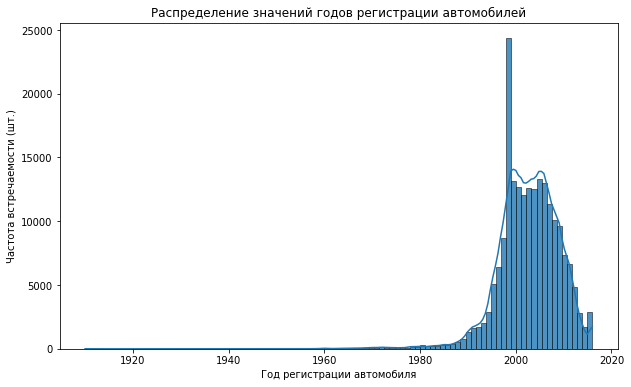

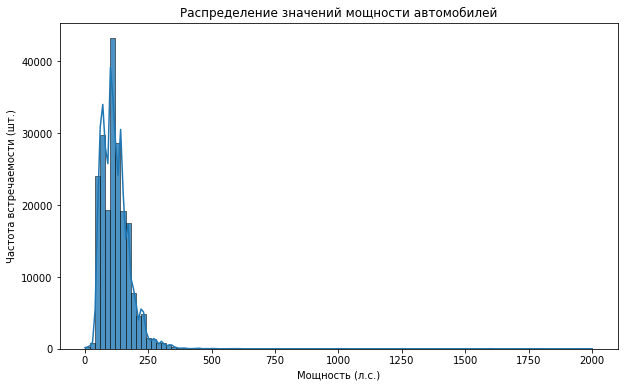

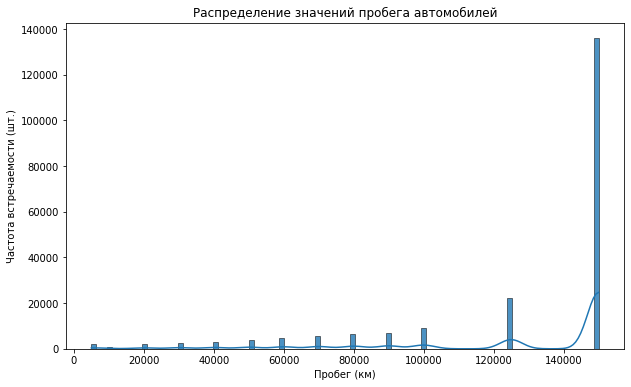

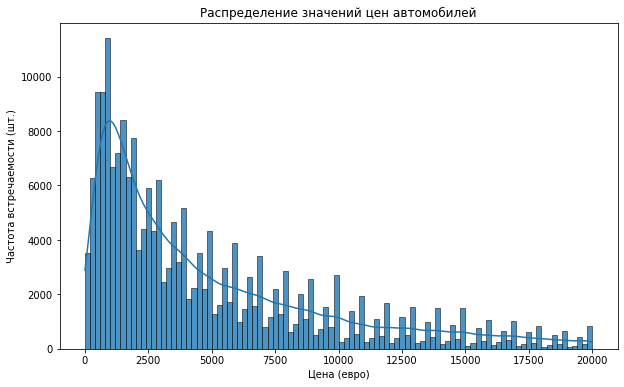

In [37]:
# строим гистограммы для числовых столбцов df_train
plot_hist(
    df_train,
    kde=True,
    bins=100,
    figsize=(10, 6),
    **dict_df_train
)

Распределение данных демонстрирует сложную структуру, вероятно, обусловленную спецификой данных. На всех гистограммах мы можем наблюдать "хвосты", свидетельствующие о содержащихся в датасете наблюдениях с экстремальными значениями того или иного признака.

### "Ящики с усами" для значений числовых признаков

In [38]:
# объявляем функцию для построения "ящиков с усами"
def plot_box(dataframe,
             figsize=None,
             y=None,
             ylabel=None,
             hue=None,
             hue_order=None,
             legend=False,
             legend_title=None,
             gap=.2,
             bbox_to_anchor=(1.0, 1.0),
             loc='upper left',
             **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    num_cols = dataframe.dtypes.loc[lambda x: (
        (x == 'int64') | (x == 'int32') | (x == 'int16') |
        (x == 'float64') | (x == 'float32') | (x == 'float16')
    )]
    for column, labels in columns.items():
        if column in num_cols:
            fig, ax = plt.subplots(figsize=figsize)
            sns.boxplot(data=dataframe,
                        x=column,
                        y=y,
                        legend=legend,
                        hue=hue,
                        hue_order=hue_order,
                        gap=gap)
            plt.xlabel(labels[0])
            plt.title(labels[1])
            if y:
                plt.ylabel(ylabel)
            if legend:
                plt.legend(title=legend_title,
                           bbox_to_anchor=bbox_to_anchor,
                           loc=loc)
            plt.show()

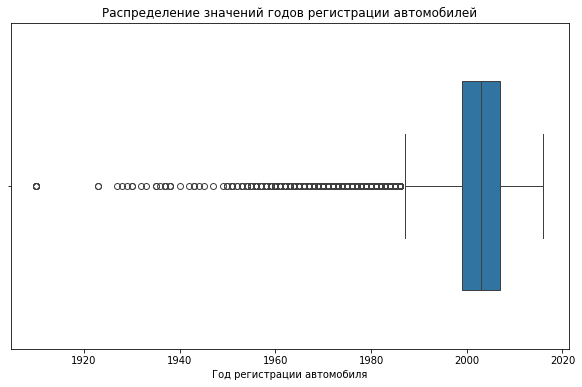

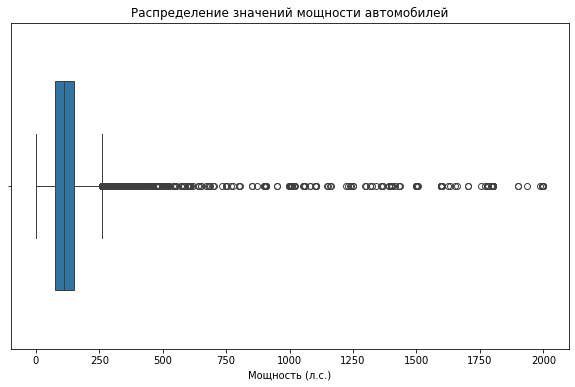

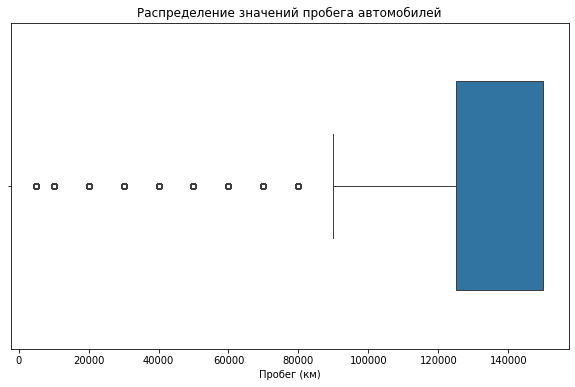

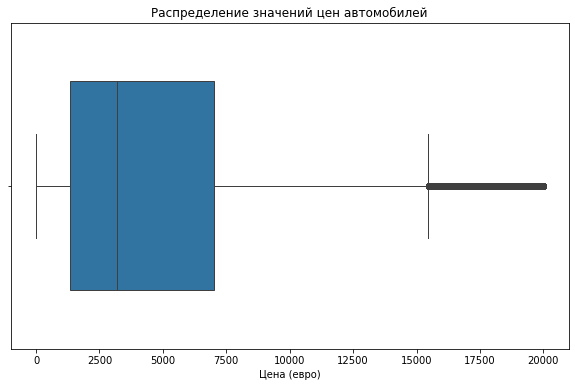

In [39]:
# строим "ящики с усами" для числовых колонок df_train
plot_box(
    df_train,
    figsize=(10, 6),
    **dict_df_train
)

Можно видеть значительное количество точек по всем чиловым признакам, статистически попадающих в зону выбросов. Однако мы не можем с уверенностью утвеждать, что это истинные выбросы и их необходимо удалить. Поэтому все эти значения оставлены в датафрейме.

### Круговые диаграммы для категориальных признаков

In [40]:
# объявляем функцию для построения круговых диаграмм
def plot_pie(dataframe,
             figsize=None,
             kind='pie',
             grid=True,
             ylabel='',
             fontsize=None,
             title_fontsize=None,
             **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [title]
    cat_cols = dataframe.dtypes.loc[lambda x: x == object]
    for column, labels in columns.items():
        if column in cat_cols:
            fig, ax = plt.subplots(figsize=figsize)
            (dataframe
             .value_counts(column)
             .plot(kind=kind,
                   grid=grid,
                   ylabel=ylabel,
                   fontsize=fontsize,
                   autopct=lambda x:
                   f'{x:.1f}%\n\
({int(round(x/100*dataframe[column].count(),0))})'
                  )
            )
            plt.title(labels, fontsize=title_fontsize)
            plt.show()

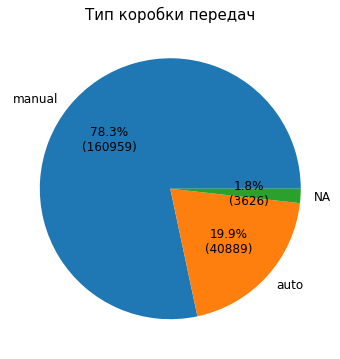

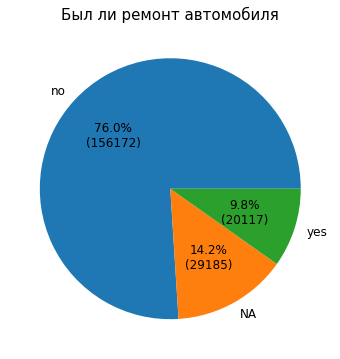

In [41]:
# строим диаграммы для датафрейма df_train
plot_pie(df_train,
         figsize=(6, 6),
         fontsize=12,
         title_fontsize=15,
         gearbox=dict_df_train['gearbox'],
         repaired=dict_df_train['repaired']
        )

Можно видеть, что после предобработки данных количество заглушек `NA` в признаке `gearbox` не превышает 2%, в признаке `repaired` таких заглушек существенно больше - 14.2% от общего объема наблюдений в тренировочной выборке.

### Столбчатые диаграммы для категориальных признаков

In [42]:
# объявляем функцию для построения столбчатых диаграмм
def plot_bar(dataframe,
             x=None,
             y=None,
             grid_ax='x',
             figsize=None,
             freq_label='Количество (шт.)',
             label=None,
             title=None):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(axis=grid_ax)
    if y:
        sns.countplot(
            data=dataframe,
            y=y,
            order=dataframe[y].value_counts().index
        )
        plt.ylabel(label)
        plt.xlabel(freq_label)
    elif x:
        sns.countplot(
            data=dataframe,
            x=x,
            order=dataframe[x].value_counts().index
        )
        plt.xlabel(label)
        plt.ylabel(freq_label)
    plt.title(title)
    plt.show()

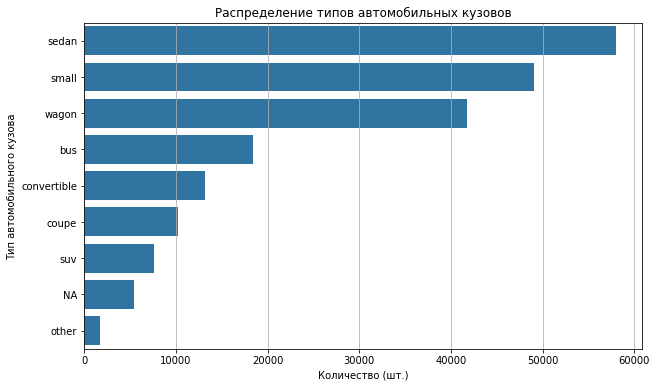

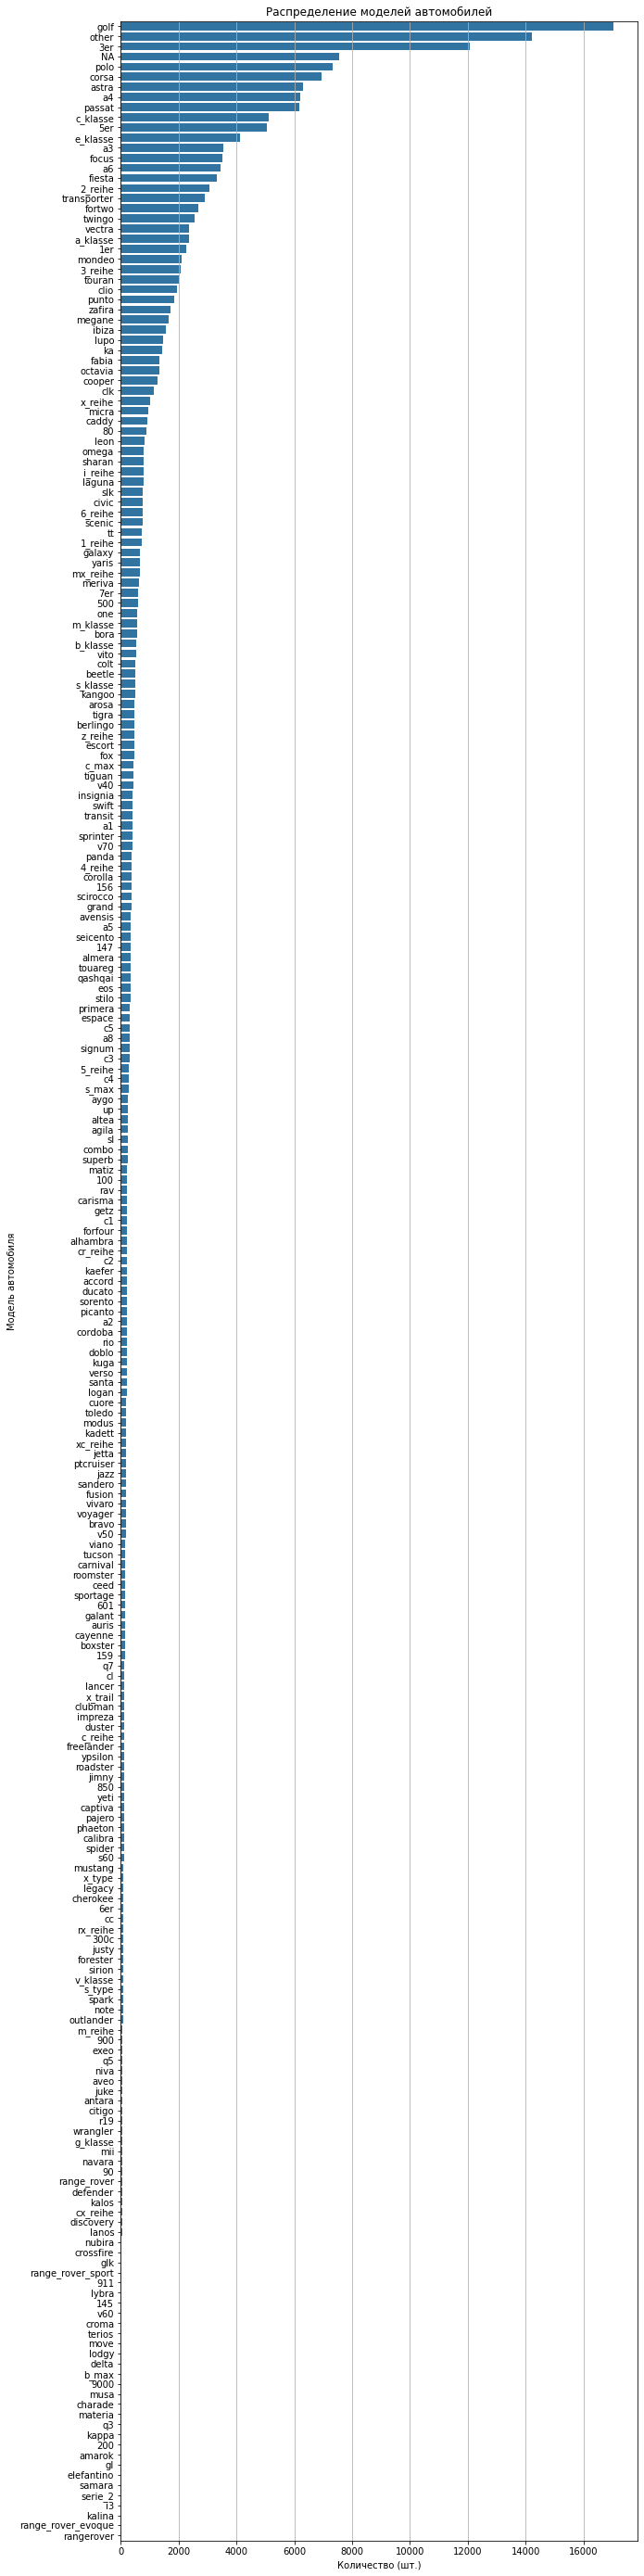

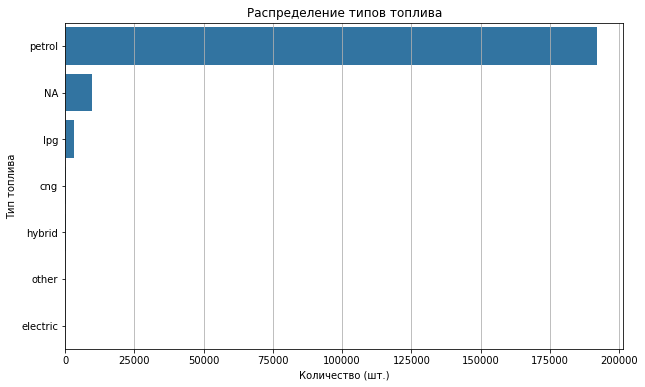

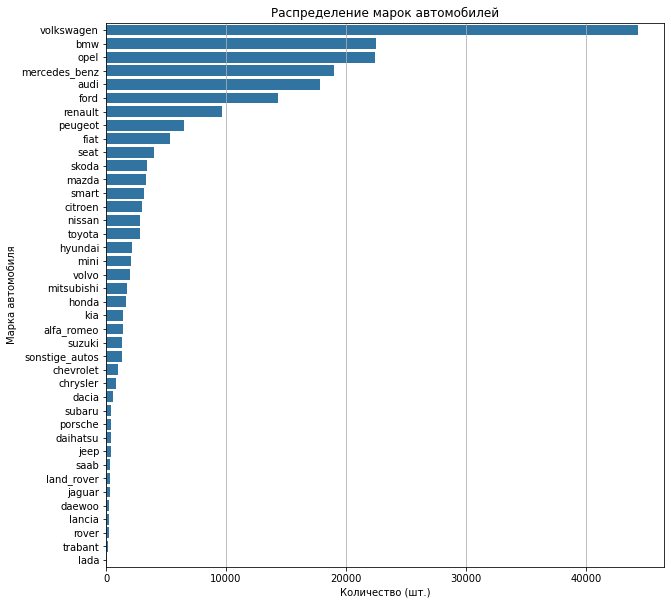

In [43]:
# строим диаграмму по типу кузова
plot_bar(
    df_train,
    figsize=(10, 6),
    y='vehicle_type',
    label='Тип автомобильного кузова',
    title='Распределение типов автомобильных кузовов'
)

# строим диаграмму по моделям автомобилей
plot_bar(
    df_train,
    figsize=(10, 50),
    y='model',
    label='Модель автомобиля',
    title='Распределение моделей автомобилей'
)

# строим диаграмму по типу топлива
plot_bar(
    df_train,
    figsize=(10, 6),
    y='fuel_type',
    label='Тип топлива',
    title='Распределение типов топлива'
)

# строим диаграмму по марке автомобиля
plot_bar(
    df_train,
    figsize=(10, 10),
    y='brand',
    label='Марка автомобиля',
    title='Распределение марок автомобилей'
)

Можно видеть, что в признаке `model` содержится большое количество уникальных наименований, что потенциально может усложнить процесс обучения моделей, если данный признак будет подвергнут OHE кодированию.

Количество заглушек `NA` в признаках `vehicle_type`, `model` и `fuel_type` статистически незначимо по сравнению с объемом выборки.

### Матрица корреляции признаков

In [44]:
# создаем список колонок с числовыми данными
interval_cols = df_train.select_dtypes(
    include=['int64', 'int32', 'int16',
             'float64', 'float32', 'float16']).columns
interval_cols

Index(['registration_year', 'power', 'kilometer', 'price'], dtype='object')

In [45]:
# получаем матрицу корреляции с помощью phik
corr_matrix = df_train.phik_matrix(interval_cols=interval_cols, bins=30)

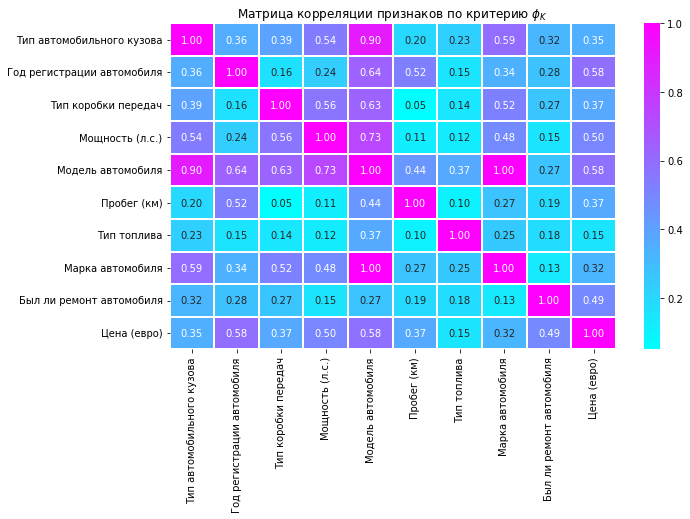

In [46]:
# визуализация матрицы корреляции
ticks_labels = [
    'Тип автомобильного кузова',
    'Год регистрации автомобиля',
    'Тип коробки передач',
    'Мощность (л.с.)',
    'Модель автомобиля',
    'Пробег (км)',
    'Тип топлива',
    'Марка автомобиля',
    'Был ли ремонт автомобиля',
    'Цена (евро)',
]
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='cool',
            linewidths=.3,
            xticklabels=ticks_labels,
            yticklabels=ticks_labels)
plt.title('Матрица корреляции признаков по критерию $\phi_K$');

Мы можем видеть, что признак `model` демонстрирует мультиколлинеарность с признаками `vehicle_type` (коэффициент корреляции 0.9) и `brand` (коэффициент корреляции 1.0). Поэтому перед обучением моделей данный признак следует удалить из выборки, таким образом избавившись от мультиколлинеарности.

Корреляция остальных входных признаков друг с другом находится в диапазоне от слабой до высокой.

Утечки целевого признака не наблюдается.

### Диаграммы зависимости целевого признака от входных признаков

In [47]:
# объявляем функцию для построения диаграмм рассеяния
def plot_scat(dataframe,
              *legend_titles,
              y=None,
              ylabel=None,
              hue=None,
              legend=False,
              figsize=None,
              hue_order=None,
              bbox_to_anchor=(1.0, 1.0),
              loc='upper left',
              **columns):
    # список legend_title содержит кортежи категориальных признаков и
    # их переводов для каждой пары x, y
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    for column, labels in columns.items():
        if hue:
            for hue, legend_title in legend_titles:
                fig, ax = plt.subplots(figsize=figsize)
                sns.scatterplot(data=dataframe,
                                x=column,
                                y=y,
                                hue=hue,
                                hue_order=hue_order)
                plt.xlabel(labels[0])
                plt.ylabel(ylabel)
                plt.title(labels[1])
                if legend:
                    plt.legend(title=legend_title,
                               bbox_to_anchor=bbox_to_anchor,
                               loc=loc)
                plt.show()
        else:
            fig, ax = plt.subplots(figsize=figsize)
            sns.scatterplot(data=dataframe,
                            x=column,
                            y=y)
            plt.xlabel(labels[0])
            plt.ylabel(ylabel)
            plt.title(labels[1])
            plt.show()

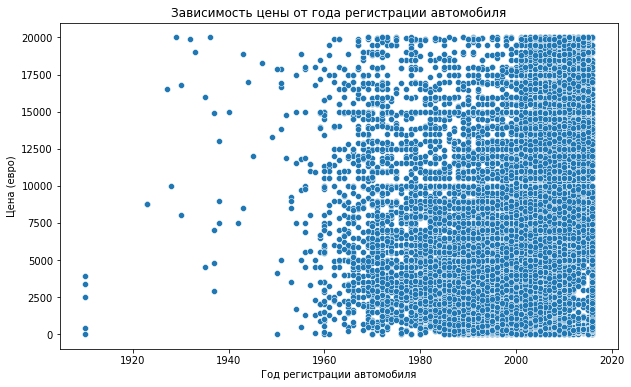

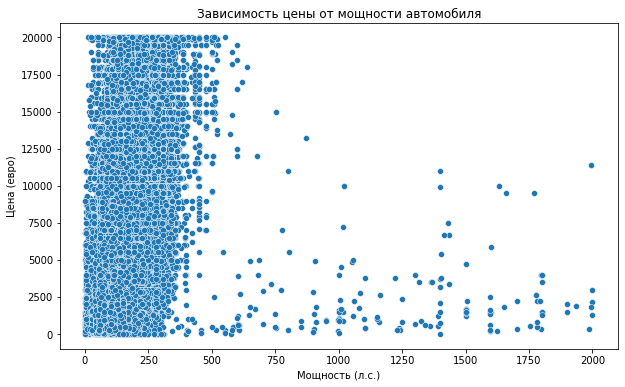

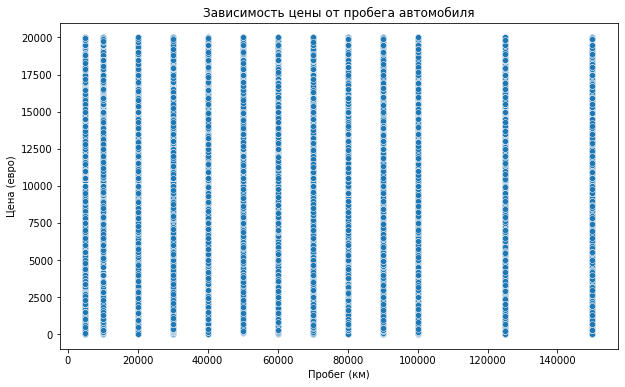

In [48]:
# диаграммы для датафрейма df_train
plot_scat(df_train,
          y='price',
          ylabel=dict_df_train['price'][0],
          figsize=(10, 6),
          registration_year=['Год регистрации автомобиля',
                            'Зависимость цены от года регистрации автомобиля'],
          power=['Мощность (л.с.)',
                 'Зависимость цены от мощности автомобиля'],
          kilometer=['Пробег (км)',
                     'Зависимость цены от пробега автомобиля'])

По диаграммам рассеяния мы не можем утверждать, что между целевым признаком и входными числовыми признаками есть устойчивая линейная зависимость.

## Подготовка данных для обучения моделей

In [49]:
# удаляем ненужные признаки из выборок
df_train.drop('model', axis=1, inplace=True)
df_valid.drop('model', axis=1, inplace=True)
df_test.drop('model', axis=1, inplace=True)

In [50]:
# проверяем тренировочную выборку на наличие полных дубликатов
print('Количество полных дубликатов в датафрейме df_train:',
      df_train.duplicated().sum())

# удаляем полные дубликаты из тренировочной выборки
df_train.drop_duplicates(inplace=True)
print('Размерность датафрейма df_train после удаления полных дубликатов:',
      df_train.shape)

Количество полных дубликатов в датафрейме df_train: 24686
Размерность датафрейма df_train после удаления полных дубликатов: (180788, 9)


In [51]:
# разделяем признаки на входные и целевые
X_train = df_train.drop('price', axis=1)
X_valid = df_valid.drop('price', axis=1)
X_test = df_test.drop('price', axis=1)
y_train = df_train.price
y_valid = df_valid.price
y_test = df_test.price

X_train.shape, X_valid.shape, X_test.shape

((180788, 8), (53155, 8), (53155, 8))

In [52]:
# создаём списки с названиями признаков
ohe_columns = ['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'repaired']
num_columns = ['registration_year', 'power', 'kilometer']

# создаём пайплайн для подготовки признаков из списка ohe_columns:
# заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        # обрабатываем пропуски
        (
            'simpleImputer_nan',
            SimpleImputer(missing_values=np.nan,
                          strategy='constant',
                          fill_value='NA')
        ),
        # обрабатываем неявные дубликаты
        (
            'simpleImputer_imp_duplicates',
            SimpleImputer(missing_values='gasoline',
                          strategy='constant',
                          fill_value='petrol')
        ),
        # выполняем кодирование номинальных категориальных признаков
        ('ohe', OneHotEncoder(drop='first',
                              handle_unknown='ignore',
                              sparse_output=False))
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

Для обучения модели дерева решений все категориальные признаки закодируем с помощью Ordinal Encoder:

In [53]:
# создаём список с названиями признаков для Decision Tree
ord_columns = ['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'repaired']

# заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        # обрабатываем пропуски
        (
            'simpleImputer_nan',
            SimpleImputer(missing_values=np.nan,
                          strategy='constant',
                          fill_value='NA')
        ),
        # обрабатываем неявные дубликаты
        (
            'simpleImputer_imp_duplicates',
            SimpleImputer(missing_values='gasoline',
                          strategy='constant',
                          fill_value='petrol')
        ),
        # выполняем кодирование категориальных признаков
        ('ord',  OrdinalEncoder(
            categories=[
                df_train.vehicle_type.unique(),
                df_train.gearbox.unique(),
                df_train.fuel_type.unique(),
                df_train.brand.unique(),
                df_train.repaired.unique()
            ],
            handle_unknown='use_encoded_value',
            unknown_value=np.nan
        )
        ),
        # заполняем пропуски после кодирования
        ('simpleImputer_after_ord',
         SimpleImputer(missing_values=np.nan,
                       strategy='constant',
                       fill_value=-1)
        )
    ]
)

data_preprocessor_tree = ColumnTransformer(
    [
        ('ord', ord_pipe, ord_columns),
        ('num', 'passthrough', num_columns)
    ],
    remainder='passthrough'
)

Для обучения модели `LightGBM` создадим отдельные выборки с входными признаками и изменим тип данных в колонках с категориальными признаками с `object` на `category`:

In [54]:
# создаём отдельные выборки с входными признаками
X_train_lgbm = X_train.copy()
X_valid_lgbm = X_valid.copy()
X_test_lgbm = X_test.copy()

In [55]:
# приводим категориальные признаки к типу category
for df in [X_train_lgbm, X_valid_lgbm, X_test_lgbm]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')

In [56]:
# проверяем типы данных в X_train_lgbm
X_train_lgbm.dtypes

vehicle_type         category
registration_year       int32
gearbox              category
power                   int32
kilometer               int32
fuel_type            category
brand                category
repaired             category
dtype: object

In [57]:
# проверяем типы данных в X_valid_lgbm
X_valid_lgbm.dtypes

vehicle_type         category
registration_year       int32
gearbox              category
power                   int32
kilometer               int32
fuel_type            category
brand                category
repaired             category
dtype: object

In [58]:
# проверяем типы данных в X_test_lgbm
X_test_lgbm.dtypes

vehicle_type         category
registration_year       int32
gearbox              category
power                   int32
kilometer               int32
fuel_type            category
brand                category
repaired             category
dtype: object

## Обучение с учителем (задача регрессии)

В данном разделе мы выполним обучение с учителем для задачи линейной регрессии следующих моделей:

- `LightGBM`;
- `CatBoostRegressor`;
- `DecisionTreeRegressor`;
- `Ridge`.

Для каждой из моделей мы подберём гиперпараметры, затем обучим модели и выполним предсказания на валидационной выборке.

Критерием удовлетворительного качества модели является значение метрики RMSE ниже 2500.

Мы также оценим время обучения и предсказания каждой из моделей.

### Обучение модели LightGBM

In [59]:
%%time
# инициализируем модель для обучения
lgb = LGBMRegressor(random_state=RANDOM_STATE,
                    n_jobs=-1,
                    verbosity=-1)

# задаем гиперпараметры для перебора
param_grid = {
    'min_data_in_leaf': [20, 30, 50],
    'max_depth': [50, 60, 70],
    'num_leaves': [300, 500, 700]
}

# инициализируем модель для поиска лучших гиперпараметов
gs = GridSearchCV(
    lgb,
    param_grid,
    n_jobs=-1,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# запускаем поиск гиперпараметров
gs.fit(X_train_lgbm, y_train)

# получаем лучшую метрику при кросс-валидации
print(f'Лучший результат метрики RMSE для модели LightGBM \
при кросс-валидации:\n', gs.best_score_)

# получаем лучшие гиперпараметры при кросс-валидации
print(f'Лучшие гиперпараметры для модели LightGBM \
при кросс-валидации:\n', gs.best_params_)

Лучший результат метрики RMSE для модели LightGBM при кросс-валидации:
 -1654.7565186928823
Лучшие гиперпараметры для модели LightGBM при кросс-валидации:
 {'max_depth': 50, 'min_data_in_leaf': 30, 'num_leaves': 500}
CPU times: user 4min 59s, sys: 11.7 s, total: 5min 11s
Wall time: 5min 12s


In [60]:
# выводим информацию о лучшем результате при кросс-валидации
(pd.DataFrame(gs.cv_results_)
 .sort_values(by='mean_test_score', ascending=False)
 .iloc[0])

mean_fit_time                                                      2.575153
std_fit_time                                                       0.068978
mean_score_time                                                    1.253052
std_score_time                                                     0.016716
param_max_depth                                                          50
param_min_data_in_leaf                                                   30
param_num_leaves                                                        500
params                    {'max_depth': 50, 'min_data_in_leaf': 30, 'num...
split0_test_score                                              -1642.210184
split1_test_score                                              -1642.454715
split2_test_score                                              -1679.604656
mean_test_score                                                -1654.756519
std_test_score                                                     17.57057
rank_test_sc

In [61]:
# инициализируем лучшую модель
lgb_best = LGBMRegressor(
    max_depth = (pd.DataFrame(gs.cv_results_)
                 .sort_values(by='mean_test_score', ascending=False)
                 .iat[0, 4]),
    min_data_in_leaf = (pd.DataFrame(gs.cv_results_)
                        .sort_values(by='mean_test_score', ascending=False)
                        .iat[0, 5]),
    num_leaves = (pd.DataFrame(gs.cv_results_)
                  .sort_values(by='mean_test_score', ascending=False)
                  .iat[0, 6]),
    random_state=RANDOM_STATE,
    n_jobs=-1)

In [62]:
# обучаем лучшую модель
start_time = time.time()

lgb_best.fit(X_train_lgbm, y_train)

end_time = time.time()
lgbm_fit_time = end_time - start_time

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 180788, number of used features: 8
[LightGBM] [Info] Start training from score 4981.018381


In [63]:
# получаем предсказания лучшей модели на валидационной выборке
start_time = time.time()

predictions_lgbm_valid = lgb_best.predict(X_valid_lgbm)

end_time = time.time()
lgbm_predict_time = end_time - start_time

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


In [64]:
# выводим значение метрики лучшей модели на валидационной выборке
rmse_lgbm = round(root_mean_squared_error(y_valid, predictions_lgbm_valid))
print('Метрика RMSE лучшей модели на валидационной выборке:',
      rmse_lgbm)

Метрика RMSE лучшей модели на валидационной выборке: 1820


In [65]:
# находим остатки
residuals = y_valid - predictions_lgbm_valid

In [66]:
# создаём функцию для визуализаии остатков
def residuals_plot(y_test, residuals):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(residuals, ax=ax[0], kde=True)
    ax[0].set_xlabel('Остатки')
    ax[0].set_ylabel('Частота встречаемости (шт.)')
    ax[0].set_title('Диаграмма распределения остатков')
    ax[0].axvline(x=np.mean(residuals), c='r', label='Среднее')
    ax[0].axvline(x=np.median(residuals), c='k', ls='--', label='Медиана')
    ax[0].legend()
    print('Среднее значение остатков:', np.mean(residuals))
    print('Медианное значение остатков:', np.median(residuals))
    
    sns.scatterplot(x=y_test, y=residuals)
    ax[1].set_xlabel('Предсказанные значения')
    ax[1].set_ylabel('Остатки')
    ax[1].set_title('Диаграмма дисперсии остатков')

Среднее значение остатков: 19.509511419585277
Медианное значение остатков: -83.04735008086823


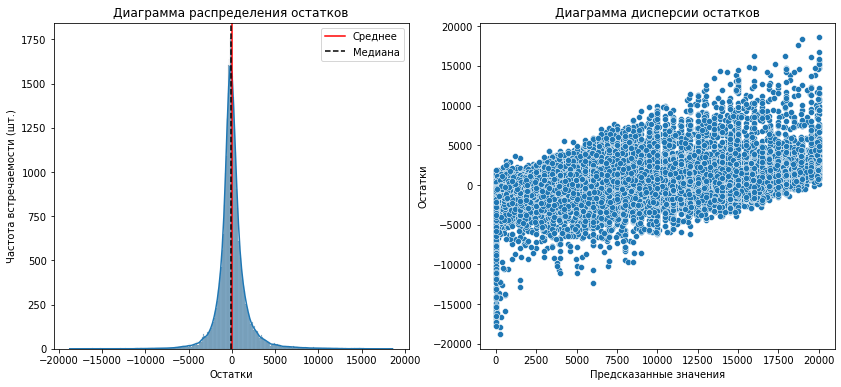

In [67]:
# визуализируем остатки
residuals_plot(y_valid, residuals)

**Вывод по результатам обучения модели LightGBM**

Лучшей моделью `LightGBM` для предсказания стоимости автомобиля является модель с гиперпараметрами `max_depth`: 50, `min_data_in_leaf`: 30, `num_leaves`: 500.

Значение среднеквадратичного отклонения предсказаний от истинных значений целевого признака (RMSE) лучшей модели на валидационной выборке составило 1820 евро, что на 165 евро хуже значения метрики при кросс-валидации, однако это обусловлено различиями в структуре данных в тренировочной и валидационных выборках и не является признаком переобучения модели.

Остатки демонстрируют распределение близкое к нормальному, что говорит о том, что практически никаких закономерностей в остатках не осталось после обучения модели.

Среднее значение остатков близко к нулю, что подтверждает хорошую предсказательную способность модели.

Дисперсию остатков можно считать постоянной на всём диапазоне предсказаний (остатки гомоскедатичны) ввиду отсутствия систематических ошибок.

Данную модель можно использовать для предсказаний.

### Обучение модели CatBoostRegressor

In [68]:
%%time
# инициализируем модель
cat = CatBoostRegressor(
    iterations=100,
    random_state=RANDOM_STATE,
    logging_level='Silent',
    cat_features=X_train.columns[X_train.dtypes == 'object'].tolist()
)

# задаем гиперпараметры для перебора
param_grid = {
    'depth': [5, 10, 13],
    'l2_leaf_reg': [1, 3, 5]
}

# инициализируем модель для поиска лучших гиперпараметов
gs = GridSearchCV(
    cat,
    param_grid,
    n_jobs=-1,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# запускаем поиск гиперпараметров
gs.fit(X_train, y_train)

# получаем лучшую метрику при кросс-валидации
print(f'Лучший результат метрики RMSE для модели CatBoostRegressor \
при кросс-валидации:\n', gs.best_score_)

# получаем лучшие гиперпараметры при кросс-валидации
print(f'Лучшие гиперпараметры для модели CatBoostRegressor \
при кросс-валидации:\n', gs.best_params_)

Лучший результат метрики RMSE для модели CatBoostRegressor при кросс-валидации:
 -1912.422991722861
Лучшие гиперпараметры для модели CatBoostRegressor при кросс-валидации:
 {'depth': 13, 'l2_leaf_reg': 1}
CPU times: user 3min 50s, sys: 885 ms, total: 3min 51s
Wall time: 4min 5s


In [69]:
# выводим информацию о лучшем результате при кросс-валидации
(pd.DataFrame(gs.cv_results_)
 .sort_values(by='mean_test_score', ascending=False)
 .iloc[0])

mean_fit_time                              14.295332
std_fit_time                                0.282214
mean_score_time                             0.074428
std_score_time                              0.000304
param_depth                                       13
param_l2_leaf_reg                                  1
params               {'depth': 13, 'l2_leaf_reg': 1}
split0_test_score                       -1898.800063
split1_test_score                       -1900.509714
split2_test_score                       -1937.959197
mean_test_score                         -1912.422992
std_test_score                             18.070309
rank_test_score                                    1
Name: 6, dtype: object

In [70]:
# инициализируем лучшую модель
cat_best = CatBoostRegressor(
    iterations=100,
    random_state=RANDOM_STATE,
    logging_level='Silent',
    cat_features=X_train.columns[X_train.dtypes == 'object'].tolist(),
    depth=(pd.DataFrame(gs.cv_results_)
                 .sort_values(by='mean_test_score', ascending=False)
                 .iat[0, 4]),
    l2_leaf_reg=(pd.DataFrame(gs.cv_results_)
                        .sort_values(by='mean_test_score', ascending=False)
                        .iat[0, 5])
)

In [71]:
# обучаем лучшую модель
start_time = time.time()

cat_best.fit(X_train, y_train)

end_time = time.time()
cat_fit_time = end_time - start_time

In [72]:
# получаем предсказания лучшей модели на валидационной выборке
start_time = time.time()

predictions_cat_valid = cat_best.predict(X_valid)

end_time = time.time()
cat_predict_time = end_time - start_time

In [73]:
# выводим значение метрики лучшей модели на валидационной выборке
rmse_cat = round(root_mean_squared_error(y_valid, predictions_cat_valid))
print('Метрика RMSE лучшей модели на валидационной выборке:',
      rmse_cat)

Метрика RMSE лучшей модели на валидационной выборке: 2058


In [74]:
# находим остатки
residuals = y_valid - predictions_cat_valid

Среднее значение остатков: -58.43695111550726
Медианное значение остатков: -293.02520080917293


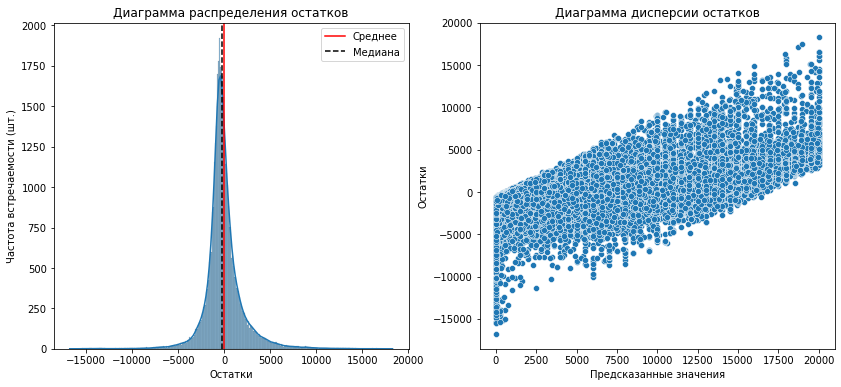

In [75]:
# визуализируем остатки
residuals_plot(y_valid, residuals)

**Вывод по результатам обучения модели CatBoostRegressor**

Лучшей моделью `CatBoostRegressor` для предсказания стоимости автомобиля является модель с гиперпараметрами `depth`: 13, `l2_leaf_reg`: 1.

Значение среднеквадратичного отклонения предсказаний от истинных значений целевого признака (RMSE) лучшей модели на валидационной выборке составило 2058 евро, что на 146 евро хуже значения метрики при кросс-валидации, однако это обусловлено различиями в структуре данных в тренировочной и валидационных выборках и не является признаком переобучения модели.

Остатки демонстрируют распределение близкое к нулю.

Остатки демонстрируют смещение относительно нуля в среднем на 60 евро - на эту сумму модель в среднем завышает предсказания значений целевого признака.

Дисперсию остатков можно считать постоянной на всём диапазоне предсказаний (остатки гомоскедатичны) ввиду отсутствия систематических ошибок.

Данную модель можно использовать для предсказаний ввиду её удовлетворительного качества.

### Обучение модели дерева решений

In [76]:
%%time
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final_tree = Pipeline(
    [
        ('preprocessor', data_preprocessor_tree),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'models__max_depth': [10, 30, 50, 100],
    'models__min_samples_split': [10, 30, 50, 100, 300],
    'models__min_samples_leaf': [5, 7, 10, 50, 100, 300]
}

# инициализируем модель для поиска лучших гиперпараметов
gs = GridSearchCV(
    pipe_final_tree,
    param_grid,
    n_jobs=-1,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# запускаем поиск гиперпараметров
gs.fit(X_train, y_train)

# получаем лучшую метрику при кросс-валидации
print(f'Лучший результат метрики RMSE для модели дерева решений \
при кросс-валидации:\n', gs.best_score_)

# получаем лучшие гиперпараметры при кросс-валидации
print(f'Лучшие гиперпараметры для модели дерева решений \
при кросс-валидации:\n', gs.best_params_)

Лучший результат метрики RMSE для модели дерева решений при кросс-валидации:
 -1889.1573942753269
Лучшие гиперпараметры для модели дерева решений при кросс-валидации:
 {'models__max_depth': 30, 'models__min_samples_leaf': 7, 'models__min_samples_split': 30}
CPU times: user 2min 36s, sys: 58.6 ms, total: 2min 36s
Wall time: 2min 36s


In [77]:
# инициализируем лучшую модель
pipe_final_tree_best = Pipeline(
    [
        ('preprocessor', gs.best_estimator_.named_steps['preprocessor']),
        ('models', gs.best_estimator_.named_steps['models'])
    ]
)

In [78]:
# обучаем лучшую модель
start_time = time.time()

pipe_final_tree_best.fit(X_train, y_train)

end_time = time.time()
tree_fit_time = end_time - start_time

In [79]:
# получаем предсказания лучшей модели на валидационной выборке
start_time = time.time()

predictions_tree_valid = pipe_final_tree_best.predict(X_valid)

end_time = time.time()
tree_predict_time = end_time - start_time

In [80]:
# выводим значение метрики лучшей модели на валидационной выборке
rmse_tree = round(root_mean_squared_error(y_valid, predictions_tree_valid))
print('Метрика RMSE лучшей модели на валидационной выборке:',
      rmse_tree)

Метрика RMSE лучшей модели на валидационной выборке: 2053


In [81]:
# находим остатки
residuals = y_valid - predictions_tree_valid

Среднее значение остатков: -18.043124594074246
Медианное значение остатков: -107.47826086956525


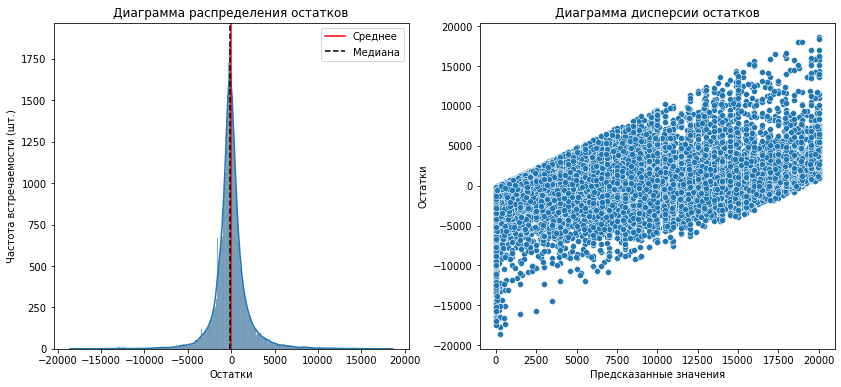

In [82]:
# визуализируем остатки
residuals_plot(y_valid, residuals)

**Вывод по результатам обучения модели дерева решений**

Лучшей моделью дерева решений для предсказания стоимости автомобиля является модель с гиперпараметрами `max_depth`: 30, `min_samples_leaf`: 7, `min_samples_split`: 30.

Значение среднеквадратичного отклонения предсказаний от истинных значений целевого признака (RMSE) лучшей модели на валидационной выборке составило 2053 евро, что на 164 евро хуже значения метрики при кросс-валидации, однако это обусловлено различиями в структуре данных в тренировочной и валидационных выборках и не является признаком переобучения модели.

Остатки демонстрируют распределение близкое к нормальному, что говорит о том, что практически никаких закономерностей в остатках не осталось после обучения модели.

Среднее значение остатков близко к нулю, что подтверждает хорошую предсказательную способность модели.

Дисперсию остатков можно считать постоянной на всём диапазоне предсказаний (остатки гомоскедатичны) ввиду отсутствия систематических ошибок.

Данную модель можно использовать для предсказаний ввиду её удовлетворительного качества.

### Обучение модели линейной регрессии с L2-регуляризацией

In [83]:
%%time
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final_ridge = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', Ridge(random_state=RANDOM_STATE))
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'models__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

# инициализируем модель для поиска лучших гиперпараметов
gs = GridSearchCV(
    pipe_final_ridge,
    param_grid,
    n_jobs=-1,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# запускаем поиск гиперпараметров
gs.fit(X_train, y_train)

# получаем лучшую метрику при кросс-валидации
print(f'Лучший результат метрики RMSE для модели Ridge \
при кросс-валидации:\n', gs.best_score_)

# получаем лучшие гиперпараметры при кросс-валидации
print(f'Лучшие гиперпараметры для модели Ridge \
при кросс-валидации:\n', gs.best_params_)

Лучший результат метрики RMSE для модели Ridge при кросс-валидации:
 -2989.6706777263244
Лучшие гиперпараметры для модели Ridge при кросс-валидации:
 {'models__alpha': 1.0}
CPU times: user 8.42 s, sys: 3.75 s, total: 12.2 s
Wall time: 12.1 s


In [84]:
# инициализируем лучшую модель
pipe_final_ridge_best = Pipeline(
    [
        ('preprocessor', gs.best_estimator_.named_steps['preprocessor']),
        ('models', gs.best_estimator_.named_steps['models'])
    ]
)

In [85]:
# обучаем лучшую модель
start_time = time.time()

pipe_final_ridge_best.fit(X_train, y_train)

end_time = time.time()
ridge_fit_time = end_time - start_time

In [86]:
# получаем предсказания лучшей модели на валидационной выборке
start_time = time.time()

predictions_ridge_valid = pipe_final_ridge_best.predict(X_valid)

end_time = time.time()
ridge_predict_time = end_time - start_time

In [87]:
# выводим значение метрики лучшей модели на валидационной выборке
rmse_ridge = round(root_mean_squared_error(y_valid, predictions_ridge_valid))
print('Метрика RMSE лучшей модели на валидационной выборке:',
      rmse_ridge)

Метрика RMSE лучшей модели на валидационной выборке: 16295


In [88]:
# находим остатки
residuals = y_valid - predictions_ridge_valid

Среднее значение остатков: -299.5012969093003
Медианное значение остатков: -406.9054787805471


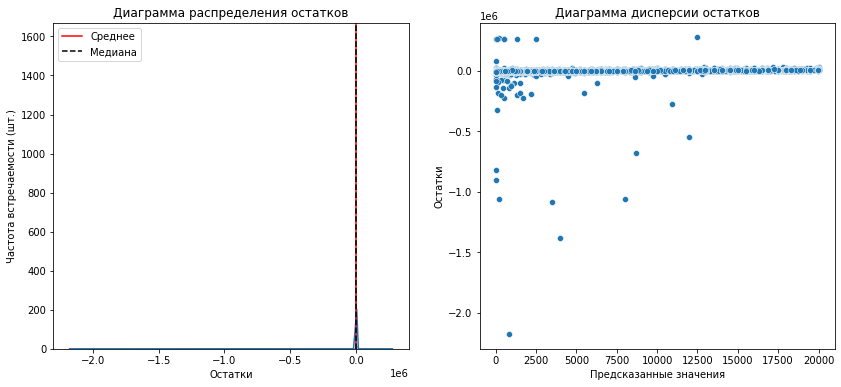

In [89]:
# визуализируем остатки
residuals_plot(y_valid, residuals)

**Вывод по результатам обучения модели линейной регрессии с L2-регуляризацией**

Лучшей моделью линейной регрессии с L2-регуляризацией для предсказания стоимости автомобиля является модель с гиперпараметром `alpha`: 1.0 для данных, масштабированных с помощью `StandardScaler`.

Значение среднеквадратичного отклонения предсказаний от истинных значений целевого признака (RMSE) лучшей модели при кросс-валидации составило 2990 евро, что выше требуемеого порога 2500 евро. На валидационной выборке значение RMSE модели составило 16295 евро, что говорит о плохой обобщающей способности модели (модель плохо справляется с выбросами).

Остатки демонстрируют смещение относительно нуля в среднем на 300 евро - на эту сумму модель в среднем завышает предсказания значений целевого признака.

Дисперсию остатков визуально можно считать постоянной на всём диапазоне предсказаний (остатки гомоскедатичны) ввиду отсутствия систематических ошибок.

Исходя из вышеизложенного, данная модель не подходит для предсказаний.

## Анализ моделей

Для анализа моделей составим таблицу со следующими характеристиками моделей: `RMSE`, `model_fit_time` (время обучения модели), `model_predict_time` (время предсказания модели).

In [90]:
model_table = pd.DataFrame(
    {'RMSE': [rmse_lgbm,
              rmse_cat,
              rmse_tree,
              rmse_ridge],
     'model_fit_time': [lgbm_fit_time,
                        cat_fit_time,
                        tree_fit_time,
                        ridge_fit_time],
     'model_predict_time': [lgbm_predict_time,
                            cat_predict_time,
                            tree_predict_time,
                            ridge_predict_time]
    },
    index=['LigthGBM', 'CatBoost', 'DecisionTree', 'Ridge']
)
model_table.sort_values(by='RMSE')

,RMSE,model_fit_time,model_predict_time
LigthGBM,1820,3.324401,0.978197
DecisionTree,2053,0.647414,0.069818
CatBoost,2058,17.569319,0.072335
Ridge,16295,0.556398,0.242780


Можно видеть, что лучшей моделью по точности предсказаний является модель `LigthGBM`, значение RMSE которой на валидационной выборке составило 1820 евро. С отставанием от нее идет модель `DecisionTree` со значением RMSE равным 2053, с небольшим отставанием от которой идет модель `CatBoost` со значением RMSE равным 2058. Модель `Ridge` показала худший результат по метрике RMSE (более 16000).

Время обучения модели `LigthGBM` находится в диапазоне от 3 до 4 секунд, в то время как модель `CatBoost` обучается дольше 15 секунд. Модели `DecisionTree` и `Ridge` обучаются за время менее 1 секунды. В целом различие во времени обучения моделей `LigthGBM`, `DecisionTree` и `Ridge` не является критичным. Модель `CatBoost` не подходит для предсказаний в связи с долгим обучением.

Время предсказания всех моделей не превышает 1.2 секунды, то есть можно считать, что данный показатель примерно одинаков у всех моделей.

На основании проведенного анализа производительности моделей можно утверждать, что лучшей моделью для предсказаний является модель `LigthGBM` с гиперпараметрами `max_depth`: 50, `min_data_in_leaf`: 30, `num_leaves`: 500, так как именно в этой модели наблюдается оптимальный баланс точности предсказаний и скорости работы.

Выполним проверку качества лучшей модели на тестовой выборке:

In [91]:
# получаем предсказания лучшей модели на тестовой выборке
predictions_lgbm_test = lgb_best.predict(X_test_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


In [92]:
# выводим значение метрики лучшей модели на тестовой выборке
print('Метрика RMSE лучшей модели на тестовой выборке:',
      round(root_mean_squared_error(y_test, predictions_lgbm_test)))

Метрика RMSE лучшей модели на тестовой выборке: 1822


Можно видеть, что значение метрики RMSE лучшей модели на тестовой выборке совпадает с значением метрики RMSE лучшей модели на валидационной выборке и составляет 1822 евро, что не превосходит требуемый порог в 2500 евро.

Посмотрим на значимость признаков лучшей модели:

In [93]:
# сформируем таблицу значимости признаков
df_feat_importance = pd.DataFrame(
    lgb_best.feature_importances_,
    columns=['Значимость признака'],
    index=[
        'Тип автомобильного кузова',
        'Год регистрации автомобиля',
        'Тип коробки передач',
        'Мощность (л.с.)',
        'Пробег (км)',
        'Тип топлива',
        'Марка автомобиля',
        'Был ли ремонт автомобиля'
    ]
)
df_feat_importance.sort_values(by='Значимость признака', ascending=False)

,Значимость признака
Мощность (л.с.),18049
Год регистрации автомобиля,12429
Пробег (км),6592
Марка автомобиля,4919
Тип автомобильного кузова,3030
Был ли ремонт автомобиля,2687
Тип коробки передач,1943
Тип топлива,251


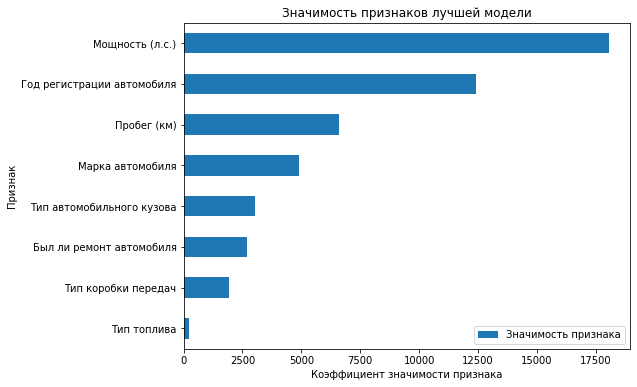

In [94]:
# визуализируем значимость признаков
(df_feat_importance
 .sort_values(by='Значимость признака')
 .plot(kind='barh', figsize=(8, 6)))
plt.title('Значимость признаков лучшей модели')
plt.xlabel('Коэффициент значимости признака')
plt.ylabel('Признак');

Наиболее значимыми признаками при выполнении предсказаний являются мощность и год регистрации автомобиля. Именно эти два признака наиболее часто участвуют в построении логических правил для предсказания стоимости автомобиля. За ними идут пробег и марка автомобиля.

Тип автомобильного кузова, наличие ремонта автомобиля, тип коробки передач и тип топлива участвуют в предсказаниях реже, чем остальные четыре признака.

## Общий вывод

Целью исследования являлось построение модели для предсказания рыночной стоимости автомобиля на основе входных признаков таких как марка автомобиля, пробег, тип коробки передач и т.п.

При выполнении исследовании учитывались следующие критерии заказчика:

- качество предсказания - метрика RMSE должна быть ниже 2500;
- время обучения модели;
- время предсказания модели.

По результатам исследования лучшей моделью была признана модель `LightGBM` с гиперпараметрами `max_depth`: 50, `min_data_in_leaf`: 30, `num_leaves`: 500, показавшая на тестовой выборке значение метрики RMSE в размере 1822 евро.

В исследовании были изучены данные о 354 тыс. автомобилей.

На этапе предобработки данных наименования колонок были приведены к формату `snake_case`, удалены полные дубликаты (4 шт.), выборка была разделена на тренировочную, валидационную и тестовую. Пропущенные значения во всех признаках были заменены заглушками `NA`. Неявные дубликаты `gasoline` в колонке `fuel_type` были заменены на `petrol`. Также из тренировочной выборки были удалены строки с нулевыми значеними в колонках `price` и `power`, а в колонках `power` и `registration_year` были удалены некоторые аномальные значения. Данные в колонках с типом `int64` были приведены к типу `int32` для увеличения быстродействия моделей.

Признаки `date_crawled`, `registration_month`, `date_created`, `number_of_pictures`, `postal_code` и `last_seen` были удалены из всех выборок ввиду их неинформативности для выполнения предсказаний.

На этапе исследовательского анализа, несмотря на довольно большое количество значений признаков, статистически попавших в область выбросов, эти значения были оставлены в датафрейме, так как у нас не было логичного предположения о характере этих выбросов и, следовательно, о решении их удалить.

На этапе корреляционного анализа была выявлена мультиколлинеарность признака `model` с признаками `vehicle_type` и `brand`. На этом основании признак `model` были удалён из выборок перед обучением моделей.

Были обучены четыре модели:

- `LightGBM`;
- `CatBoostRegressor`;
- `DecisionTreeRegressor`;
- `Ridge`.

Для обучения модели `Ridge` категориальные признаки были закодированы с помощью `OneHotEncoder`, для обучения модели `DecisionTreeRegressor` - с помощью `OrdinalEncoder`. Для обучения моделей `LightGBM` и `CatBoostRegressor` использовались встроенные функции кодирования категориальных признаков.

По результатам обучения были подобраны следующием гиперпараметры для моделей:

- `LightGBM`: `max_depth`: 50, `min_data_in_leaf`: 30, `num_leaves`: 500;
- `CatBoostRegressor`: `depth`: 13, `l2_leaf_reg`: 1;
- `DecisionTreeRegressor`: `max_depth`: 30, `min_samples_leaf`: 7, `min_samples_split`: 30;
- `Ridge`: `alpha`: 1.0 для данных, масштабированных с помощью `StandardScaler`.

Наилучшее качество на валидационной выборке показала модель `LightGBM`: RMSE = 1820, на втором месте - модели `DecisionTreeRegressor` с RMSE = 2053 и `CatBoostRegressor` с RMSE = 2058, с огромным отрывом на третьем месте оказалась модель `Ridge`, показавшая на валидационной выборке значение RMSE в размере 16295.

Модель `CatBoostRegressor` обучается более 15 секунд, что неприемлемо. Остальные модели обучаются за время, не превышающее 4 секунд. Время выполнения предсказаний всеми моделями не превышает 1.2 секунды.

По результатам анализа производительности лучшей из моделей была признана модель `LightGBM`.

Наиболее значимыми признаками при выполнении предсказаний моделью `LightGBM` являются мощность и год регистрации автомобиля, а также пробег и марка автомобиля. Тип автомобильного кузова, наличие ремонта автомобиля, тип коробки передач и тип топлива участвуют в предсказаниях реже, чем остальные четыре признака.